### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [3]:
# Agregar columna de tienda a cada DataFrame
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Unir todos los DataFrames
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Visualizar primeras filas
df_total.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



,Ingresos
Tienda,
Tienda 1,1.212258e+09
Tienda 2,1.175829e+09
Tienda 3,1.156536e+09
Tienda 4,1.093693e+09


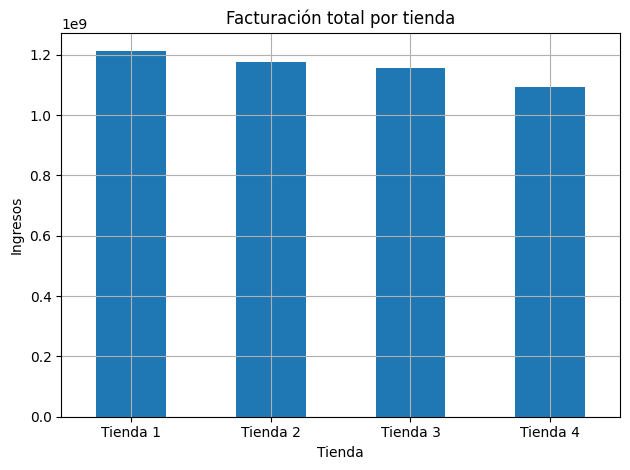

In [6]:
df_total["Ingresos"] = df_total["Precio"] + df_total["Costo de envío"]

facturacion = df_total.groupby("Tienda")["Ingresos"].sum().sort_values(ascending=False)
display(facturacion)

# Gráfico de barras
import matplotlib.pyplot as plt

facturacion.plot(kind='bar', title='Facturación total por tienda', ylabel='Ingresos', xlabel='Tienda')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()



1. Ingresos Totales
La Tienda 4 presenta el menor nivel de facturación ($1.094 MM), muy
 por debajo de la tienda líder (Tienda 1 con $1.212 MM). Esto indica una menor rentabilidad general.

# 2. Ventas por categoría

Categoría del Producto,Artículos para el hogar,Deportes y diversión,Electrodomésticos,Electrónicos,Instrumentos musicales,Juguetes,Libros,Muebles
Tienda,,,,,,,,
Tienda 1,171,284,312,448,182,324,173,465
Tienda 2,181,275,305,422,224,313,197,442
Tienda 3,177,277,278,451,177,315,185,499
Tienda 4,201,277,254,451,170,338,187,480


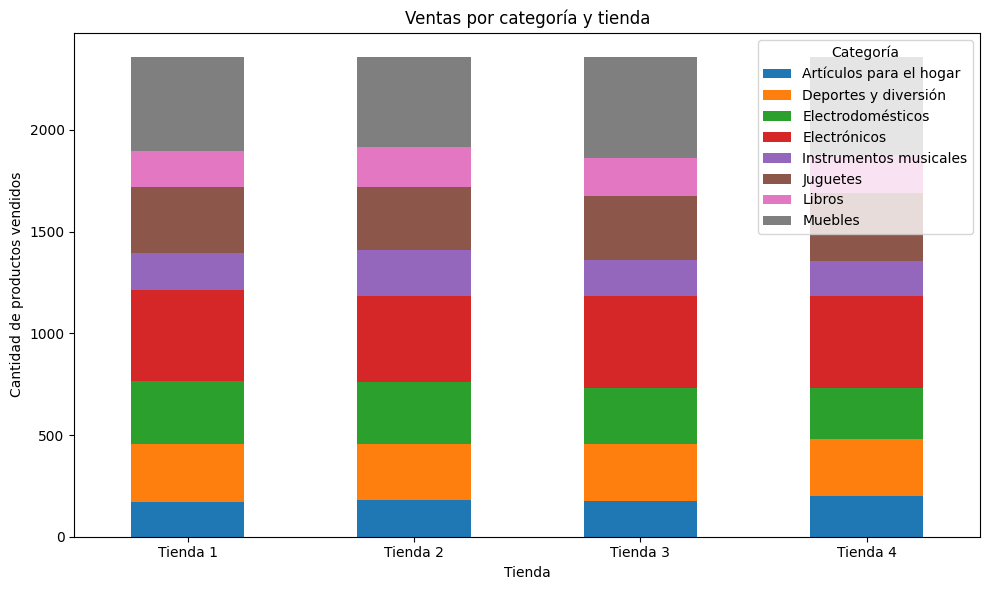

In [7]:
ventas_categoria = df_total.groupby(["Tienda", "Categoría del Producto"])["Producto"].count().unstack().fillna(0)
display(ventas_categoria)

# Gráfico de barras apiladas
ventas_categoria.plot(kind='bar', stacked=True, figsize=(10,6), title="Ventas por categoría y tienda")
plt.ylabel("Cantidad de productos vendidos")
plt.xlabel("Tienda")
plt.xticks(rotation=0)
plt.legend(title="Categoría")
plt.tight_layout()
plt.show()


2. Ventas por Categoría
Aunque la Tienda 4 muestra una distribución balanceada en categorías como Juguetes y Muebles, su volumen total de productos vendidos es ligeramente inferior. Esto sugiere un desempeño aceptable, pero no sobresaliente.

# 3. Calificación promedio de la tienda


,Calificación
Tienda,
Tienda 3,4.048326
Tienda 2,4.037304
Tienda 4,3.995759
Tienda 1,3.976685


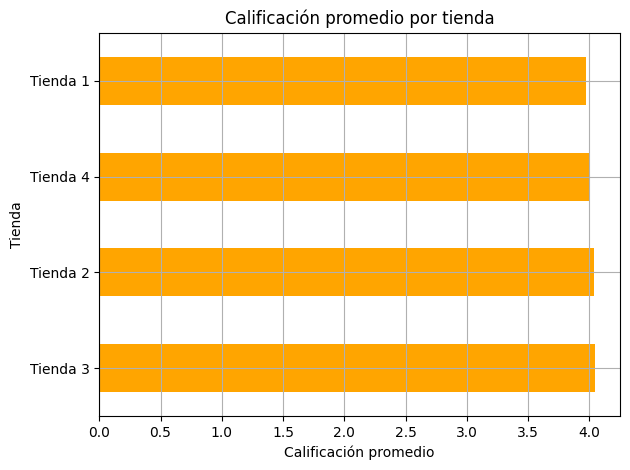

In [8]:
calificaciones = df_total.groupby("Tienda")["Calificación"].mean().sort_values(ascending=False)
display(calificaciones)

# Gráfico de barras horizontales
calificaciones.plot(kind='barh', title="Calificación promedio por tienda", xlabel="Calificación promedio", color="orange")
plt.grid(True)
plt.tight_layout()
plt.show()


3. Calificación Promedio
La Tienda 4 ocupa el 3er lugar en satisfacción del cliente (3.99), por debajo de Tienda 3 y Tienda 2, lo que revela oportunidades de mejora en experiencia o servicio.

# 4. Productos más y menos vendidos

In [9]:
ventas_productos = df_total.groupby(["Tienda", "Producto"]).size().reset_index(name='Cantidad')
mas_vendidos = ventas_productos.sort_values(['Tienda','Cantidad'], ascending=[True, False]).groupby('Tienda').first()
menos_vendidos = ventas_productos.sort_values(['Tienda','Cantidad'], ascending=[True, True]).groupby('Tienda').first()

print("Productos más vendidos por tienda:\n")
display(mas_vendidos)

print("\nProductos menos vendidos por tienda:\n")
display(menos_vendidos)


Productos más vendidos por tienda:



,Producto,Cantidad
Tienda,,
Tienda 1,Armario,60
Tienda 2,Iniciando en programación,65
Tienda 3,Kit de bancas,57
Tienda 4,Cama box,62



Productos menos vendidos por tienda:



,Producto,Cantidad
Tienda,,
Tienda 1,Auriculares con micrófono,33
Tienda 2,Juego de mesa,32
Tienda 3,Bloques de construcción,35
Tienda 4,Guitarra eléctrica,33


4. Productos más y menos vendidos
Tienda 4 se destaca con un producto top (Cama box) con 62 unidades vendidas, sin embargo, su producto menos vendido (Guitarra eléctrica) también refleja baja rotación similar al resto. El rendimiento no compensa sus debilidades en otros frentes.

# 5. Envío promedio por tienda

,Costo de envío
Tienda,
Tienda 4,23459.457167
Tienda 3,24805.680373
Tienda 2,25216.235693
Tienda 1,26018.609580


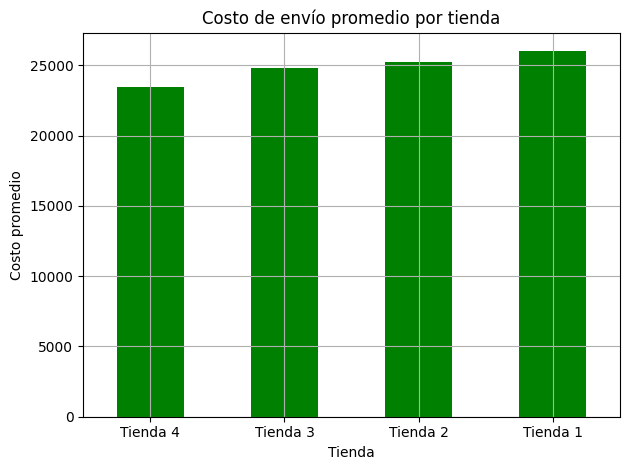

In [10]:
# Cálculo del envío promedio
envio_promedio = df_total.groupby("Tienda")["Costo de envío"].mean().sort_values(ascending=True)
display(envio_promedio)

# Gráfico de barras
envio_promedio.plot(kind='bar', color='green', title='Costo de envío promedio por tienda', ylabel='Costo promedio', xlabel='Tienda')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()



5. Costo de Envío Promedio
Tienda 4 presenta el costo de envío más bajo entre todas las tiendas ($23.459), lo cual es positivo, pero no suficiente para revertir su bajo nivel de ingresos y desempeño general.

✅ Recomendación Final

Se recomienda vender la Tienda 4.
Esta decisión se sustenta en:

Su bajo nivel de facturación total.
Una calificación promedio por debajo del estándar.
Un desempeño de ventas menos eficiente en comparación con el resto.
Aunque presenta un costo de envío competitivo, esto no se traduce en mayor rentabilidad ni diferenciación clara.